# Submission 1: NLP Model
Vian Sebastian Bromokusumo

> username: vianvian


> email: viansebastianbromokusumo@mail.ugm.ac.id


In [ ]:
# Criteria:
# 1. LSTM architecture      <---->
# 2. Sequential model      <---->
# 3. Validation set = 0.2   <---->
# 4. Apply Embedding        <---->
# 5. Apply Tokenizer        <---->
# 6. Apply Callbacks        <---->
# 7. Accuracy > 90%         <---->
# 8. Dataset = min. 2000 data samples, min. 3 categories/classes    <---->
# 9. Plot loss and accuracy for training and validation             <---->

In [ ]:
import pandas as pd

# dataset handling
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Intermediate/archive/sentiment labelled sentences/emotions/train.txt', names = ['sentence', 'label'], sep = ';')
df1.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Intermediate/archive/sentiment labelled sentences/emotions/test.txt', names = ['sentence', 'label'], sep = ';')
df2.head()

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Intermediate/archive/sentiment labelled sentences/emotions/val.txt', names = ['sentence', 'label'], sep = ';')
df3.head()

,sentence,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))

16000
2000
2000


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index = True)
print(len(df))

20000


In [ ]:
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# stopwords handling

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
  return ' '.join(filtered_sentence)

df['cleaned_sentence'] = df['sentence'].apply(remove_stopwords)

df = df[['cleaned_sentence', 'sentence', 'label']]
df = df.drop(columns = ['sentence'])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_sentence,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [ ]:
# one hot encoding
emotions = pd.get_dummies(df.label)
new_df = pd.concat([df, emotions], axis = 1)
new_df = new_df.drop(columns = 'label')

new_df

,cleaned_sentence,anger,fear,joy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,im ssa examination tomorrow morning im quite w...,0,0,0,0,1,0
19996,constantly worry fight nature push limits inne...,0,0,1,0,0,0
19997,feel important share info experience thing,0,0,1,0,0,0
19998,truly feel passionate enough something stay tr...,0,0,1,0,0,0


In [ ]:
average_word_count = new_df['cleaned_sentence'].apply(lambda x: len(word_tokenize(x))).mean()

print("Average word count:", average_word_count)

Average word count: 9.33195


In [ ]:
new_df.head()

,cleaned_sentence,anger,fear,joy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0


In [ ]:
x = new_df['cleaned_sentence'].values
y = new_df[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(len(x_train))
print(len(x_test))

16000
4000


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer
tokenizer = Tokenizer(num_words = 5000, oov_token='x')

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

# padding
padded_train = pad_sequences(train_seq)
padded_test = pad_sequences(test_seq)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

In [ ]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc = logs.get('accuracy')
    val_acc = logs.get('val_accuracy')

    if(acc > 0.97 and val_acc > 0.90):
      print("\nReached wanted accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# model training
history = model.fit(
    padded_train,
    y_train,
    epochs = 30,
    verbose = 2,
    validation_data = (padded_test, y_test),
    callbacks = [callbacks]
)

Epoch 1/30
500/500 - 17s - loss: 1.4341 - accuracy: 0.3722 - precision_2: 0.5632 - recall_2: 0.0941 - val_loss: 1.1043 - val_accuracy: 0.5953 - val_precision_2: 0.8550 - val_recall_2: 0.3257 - 17s/epoch - 34ms/step
Epoch 2/30
500/500 - 5s - loss: 0.7662 - accuracy: 0.7053 - precision_2: 0.8658 - recall_2: 0.5717 - val_loss: 0.6112 - val_accuracy: 0.7788 - val_precision_2: 0.8430 - val_recall_2: 0.7180 - 5s/epoch - 10ms/step
Epoch 3/30
500/500 - 5s - loss: 0.4431 - accuracy: 0.8424 - precision_2: 0.8798 - recall_2: 0.7999 - val_loss: 0.4966 - val_accuracy: 0.8382 - val_precision_2: 0.8593 - val_recall_2: 0.8200 - 5s/epoch - 9ms/step
Epoch 4/30
500/500 - 3s - loss: 0.2954 - accuracy: 0.9064 - precision_2: 0.9195 - recall_2: 0.8917 - val_loss: 0.4401 - val_accuracy: 0.8700 - val_precision_2: 0.8815 - val_recall_2: 0.8650 - 3s/epoch - 6ms/step
Epoch 5/30
500/500 - 3s - loss: 0.2157 - accuracy: 0.9317 - precision_2: 0.9399 - recall_2: 0.9220 - val_loss: 0.4171 - val_accuracy: 0.8780 - val_p

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision_2']
val_precision = history.history['val_precision_2']
recall = history.history['recall_2']
val_recall = history.history['val_recall_2']

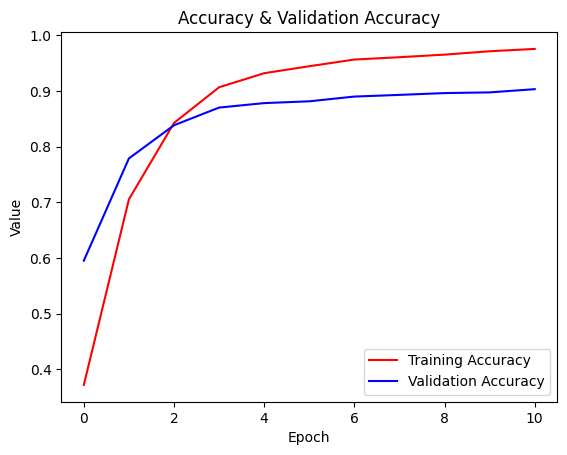

In [ ]:
import matplotlib.pyplot as plt

# plot accuracies
plt.plot(accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc = 0)
plt.show()

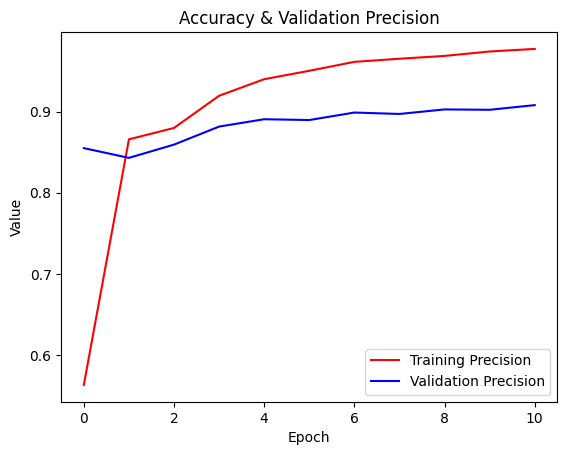

In [ ]:
# plot precisions
plt.plot(precision, 'r', label='Training Precision')
plt.plot(val_precision, 'b', label='Validation Precision')
plt.title('Accuracy & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc = 0)
plt.show()

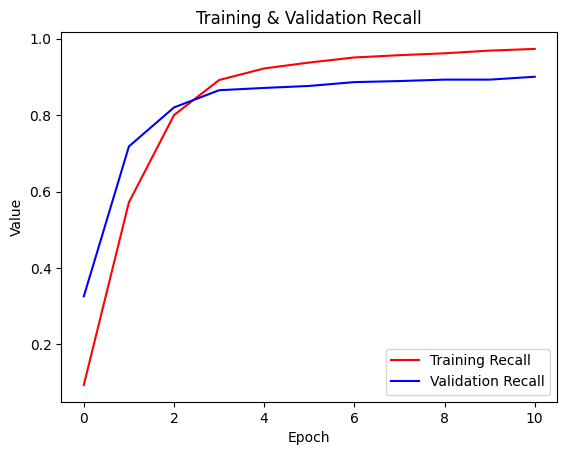

In [ ]:
# plot recalls
plt.plot(recall, 'r', label='Training Recall')
plt.plot(val_recall, 'b', label='Validation Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc = 0)
plt.show()

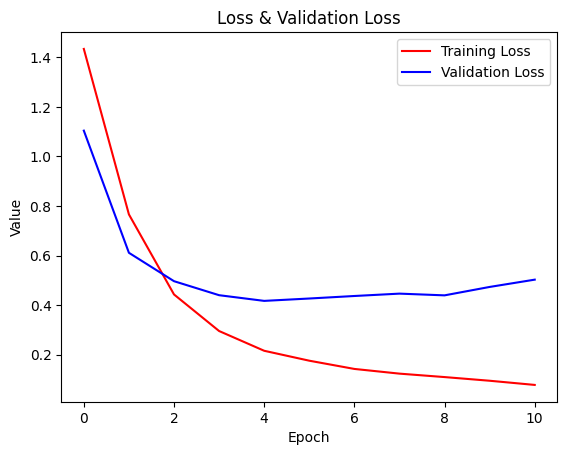

In [ ]:
# plot losses
plt.plot(loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc = 0)
plt.show()